<a href="https://colab.research.google.com/github/RKNahid/Automated-Sleep-Stage-Detection-using-Machine-Learning-Algorithm/blob/main/Project_Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(x_temp,y_temp):
  smote = SMOTE()

  x_temp, y_temp = smote.fit_resample(x_temp, y_temp)

  return x_temp, y_temp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def divide_dataset(dataset,numOrper,random_state = 0):

  rows,cols = dataset.shape

  if random_state == 0:
    if type(numOrper) == int:
      return dataset.iloc[:numOrper,:]
    else:
      return dataset.iloc[:int(rows*(numOrper)),:]
  else:
    import random
    if type(numOrper) == int:
      l_r = random.sample(range(0, rows), numOrper)
    else:
      l_r = random.sample(range(0, rows), int(rows*(numOrper)))
    return dataset.iloc[l_r,:]

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Thesis_Data/REM_NREM.csv")
target = "Sleep_Stage"

In [ ]:
df.head()

,Sleep_Stage,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,Spectral Edge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,Spectral Edge_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,Spectral Edge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,Spectral Edge_Gamma_O2,PeakF_Gamma_O2
0,NREM,0.00034,10.11512,17.85756,17.48293,10.24000,0.00047,17.73268,25.35024,27.47317,...,0.00112,0.74927,6.36878,2.87220,0.62439,0.000076,32.71805,43.83220,49.95122,49.95122
1,NREM,0.00035,10.73951,17.60780,17.10829,9.11610,0.00048,16.85854,25.22537,26.97366,...,0.00070,0.99902,6.86829,3.62146,0.74927,0.000072,32.09366,44.33171,49.95122,49.95122
2,NREM,0.00035,9.36585,17.60780,16.98341,9.24098,0.00042,17.35805,26.09951,28.47220,...,0.00077,1.49854,6.49366,4.12098,0.74927,0.000069,33.09268,43.95707,49.95122,49.95122
3,NREM,0.00050,10.36488,16.60878,15.85951,7.99220,0.00053,15.48488,24.10146,25.72488,...,0.00130,1.87317,6.11902,3.74634,0.37463,0.000070,31.59415,42.83317,49.95122,49.95122
4,NREM,0.00072,9.36585,15.98439,15.48488,7.99220,0.00067,15.11024,22.22829,23.22732,...,0.00123,1.49854,6.61854,3.74634,0.74927,0.000060,29.47122,45.08098,49.95122,49.95122


In [ ]:
df.tail()

,Sleep_Stage,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,Spectral Edge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,Spectral Edge_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,Spectral Edge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,Spectral Edge_Gamma_O2,PeakF_Gamma_O2
89091,NREM,0.00055,11.36390,19.73073,19.35610,10.36488,0.00112,21.35415,31.34439,34.96585,...,0.00779,0.74927,4.87024,1.87317,0.62439,0.000420,34.96585,41.08488,48.45268,36.21463
89092,NREM,0.00052,10.61463,18.10732,17.60780,8.61659,0.00084,19.85561,31.21951,36.33951,...,0.00620,0.99902,4.87024,2.24780,0.49951,0.000330,36.83902,43.45756,50.95024,36.46439
89093,NREM,0.00031,10.11512,17.48293,16.85854,10.11512,0.00039,16.73366,24.97561,26.97366,...,0.00101,1.12390,6.99317,3.74634,0.49951,0.000063,29.09659,37.58829,45.20585,24.22634
89094,NREM,0.00042,9.99024,16.35902,15.85951,9.86537,0.00044,15.73463,24.85073,26.47415,...,0.00426,1.12390,5.24488,2.24780,1.24878,0.000065,29.59610,39.08683,47.57854,24.97561
89095,NREM,0.00040,9.86537,15.73463,14.98537,10.36488,0.00037,14.48585,22.72780,24.10146,...,0.00116,0.87415,7.36780,3.99610,0.74927,0.000041,27.09854,36.58927,43.08293,21.10439


In [ ]:
df.shape    #(row,col)

(89096, 76)

In [ ]:
sorted(list(set(df[target])))

['NREM', 'REM']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89096 entries, 0 to 89095
Data columns (total 76 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sleep_Stage             89096 non-null  object 
 1   MeanP_Alpha_F4          89096 non-null  float64
 2   MedianF_Alpha_F4        89096 non-null  float64
 3   MeanF_Alpha_F4          89096 non-null  float64
 4   Spectral Edge_Alpha_F4  89096 non-null  float64
 5   PeakF_Alpha_F4          89096 non-null  float64
 6   MeanP_Beta_F4           89096 non-null  float64
 7   MedianF_Beta_F4         89096 non-null  float64
 8   MeanF_Beta_F4           89096 non-null  float64
 9   Spectral Edge_Beta_F4   89096 non-null  float64
 10  PeakF_Beta_F4           89096 non-null  float64
 11  MeanP_Theta_F4          89096 non-null  float64
 12  MedianF_Theta_F4        89096 non-null  float64
 13  MeanF_Theta_F4          89096 non-null  float64
 14  Spectral Edge_Theta_F4  89096 non-null

In [ ]:
new_data = divide_dataset(df,0.08,1)

In [ ]:
new_data.shape

(7127, 76)

In [ ]:
df = new_data

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df[target] = encoder.fit_transform(df[target])

In [ ]:
sorted(list(set(df[target])))

[0, 1]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7127 entries, 70998 to 54037
Data columns (total 76 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sleep_Stage             7127 non-null   int64  
 1   MeanP_Alpha_F4          7127 non-null   float64
 2   MedianF_Alpha_F4        7127 non-null   float64
 3   MeanF_Alpha_F4          7127 non-null   float64
 4   Spectral Edge_Alpha_F4  7127 non-null   float64
 5   PeakF_Alpha_F4          7127 non-null   float64
 6   MeanP_Beta_F4           7127 non-null   float64
 7   MedianF_Beta_F4         7127 non-null   float64
 8   MeanF_Beta_F4           7127 non-null   float64
 9   Spectral Edge_Beta_F4   7127 non-null   float64
 10  PeakF_Beta_F4           7127 non-null   float64
 11  MeanP_Theta_F4          7127 non-null   float64
 12  MedianF_Theta_F4        7127 non-null   float64
 13  MeanF_Theta_F4          7127 non-null   float64
 14  Spectral Edge_Theta_F4  7127 non-nu

Dataset Spliting

In [ ]:
x = df.loc[:,df.columns != target]       #df.loc[starting_row : ending row, list_of_columns]

y = df[target]

In [ ]:
x.head()

,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,Spectral Edge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,Spectral Edge_Beta_F4,PeakF_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,Spectral Edge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,Spectral Edge_Gamma_O2,PeakF_Gamma_O2
70998,0.000720,10.73951,17.98244,17.73268,6.74341,0.001020,17.73268,25.47512,26.84878,16.73366,...,0.00092,1.74829,7.61756,4.24585,0.74927,0.000078,26.22439,32.84293,38.96195,21.35415
64453,0.000920,8.86634,14.11122,13.36195,8.11707,0.000640,12.98732,25.10049,26.47415,10.86439,...,0.01073,1.62341,5.36976,3.12195,1.24878,0.000360,49.82634,49.82634,49.95122,49.95122
77121,0.000610,9.99024,16.98341,16.48390,8.24195,0.000670,15.85951,22.85268,24.22634,14.36098,...,0.00130,0.87415,6.86829,3.12195,0.74927,0.000040,27.59805,40.46049,49.82634,49.95122
60845,0.000540,10.11512,15.23512,14.48585,12.23805,0.000490,13.61171,22.72780,23.72683,12.23805,...,0.00414,0.74927,6.11902,2.37268,0.62439,0.000073,31.09463,49.57659,49.95122,49.95122
72280,0.000073,8.49171,15.60976,14.36098,5.74439,0.000061,15.60976,26.84878,30.09561,49.95122,...,0.00155,1.37366,6.11902,3.74634,1.12390,0.000026,33.34244,49.70146,49.95122,49.95122


In [ ]:
y.head()

70998    1
64453    0
77121    0
60845    0
72280    1
Name: Sleep_Stage, dtype: int64

Dataset Spliting for train & test

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
df[target].value_counts()

0    5828
1    1299
Name: Sleep_Stage, dtype: int64

In [ ]:
y_train.value_counts()

0    4680
1    1021
Name: Sleep_Stage, dtype: int64

In [ ]:
x_train, y_train = balance(x_train, y_train)

In [ ]:
y_train.value_counts()

1    4680
0    4680
Name: Sleep_Stage, dtype: int64

**Training Phase**

Random Forest

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(x_train, y_train)



CPU times: user 6.63 s, sys: 0 ns, total: 6.63 s
Wall time: 6.65 s


RandomForestClassifier()

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy: ",accuracy_score(y_test,y_pred))

[[1056   92]
 [  69  209]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1148
           1       0.69      0.75      0.72       278

    accuracy                           0.89      1426
   macro avg       0.82      0.84      0.83      1426
weighted avg       0.89      0.89      0.89      1426

Accuracy:  0.8870967741935484


#Tunning

##N estimator tunning

25/400 round completed......................... Accurecy: 0.8807854137447405
50/400 round completed......................... Accurecy: 0.879382889200561
75/400 round completed......................... Accurecy: 0.8814866760168303
100/400 round completed......................... Accurecy: 0.8800841514726507
125/400 round completed......................... Accurecy: 0.8856942496493688
150/400 round completed......................... Accurecy: 0.8920056100981767
175/400 round completed......................... Accurecy: 0.8870967741935484
200/400 round completed......................... Accurecy: 0.8842917251051894
225/400 round completed......................... Accurecy: 0.8821879382889201
250/400 round completed......................... Accurecy: 0.8927068723702665
275/400 round completed......................... Accurecy: 0.8877980364656382
300/400 round completed......................... Accurecy: 0.884992987377279
325/400 round completed......................... Accurecy: 0.88920056

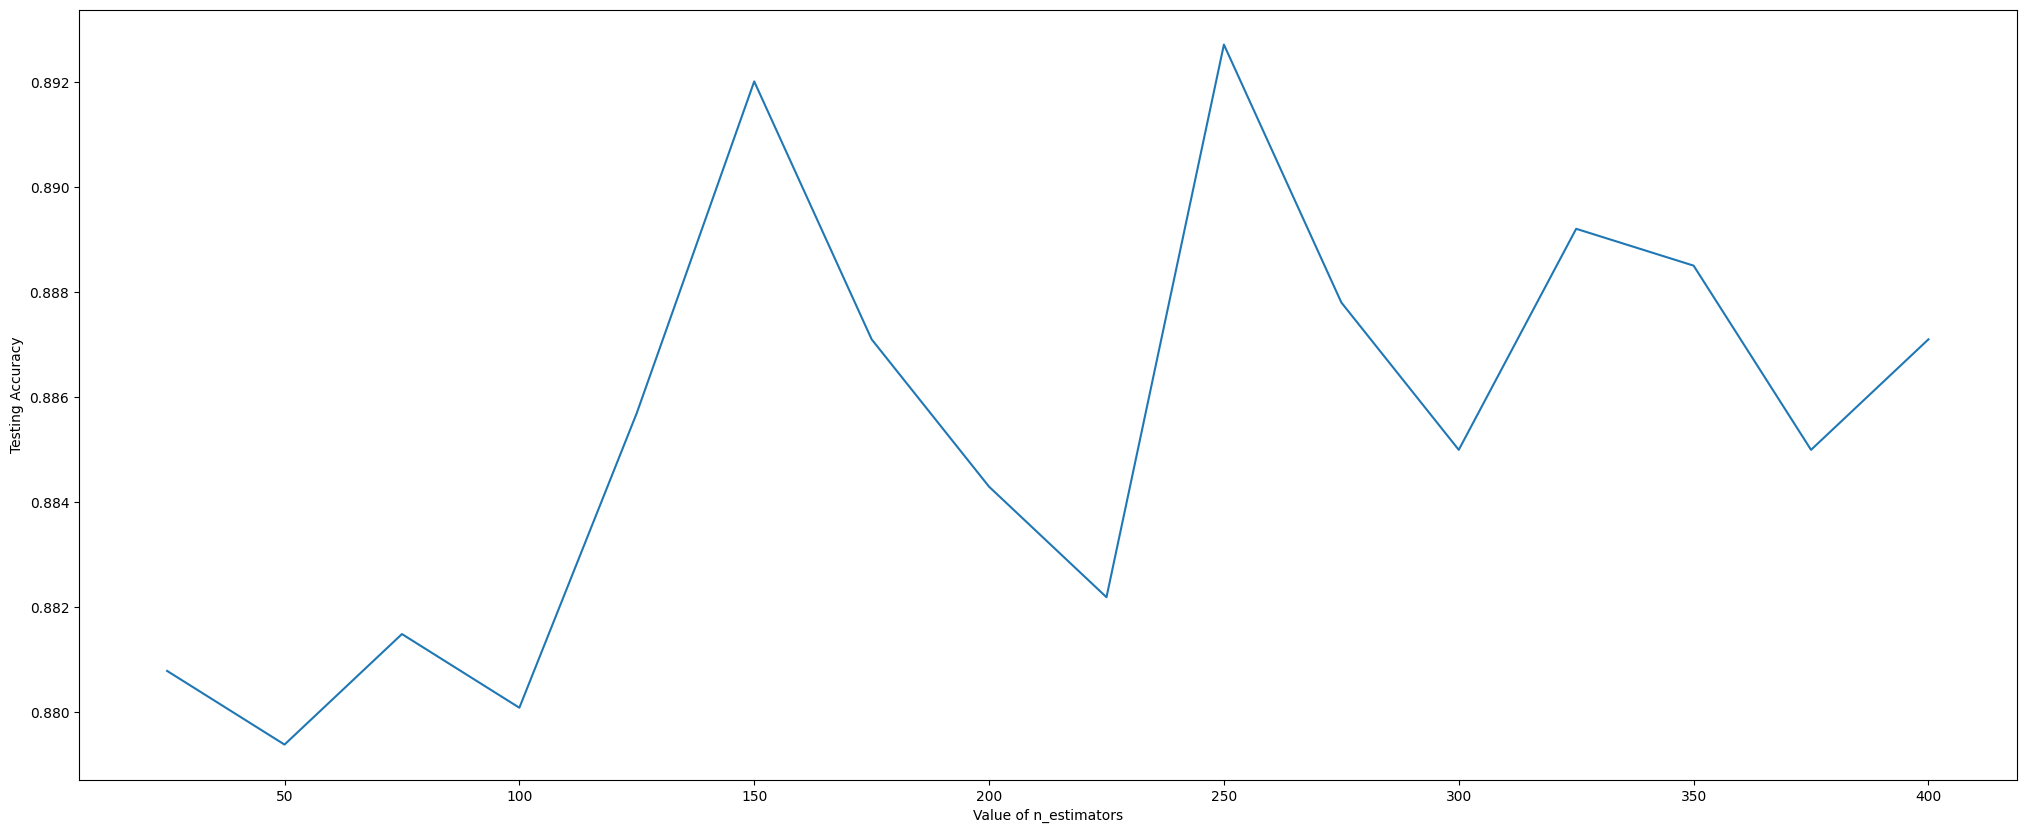

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=400
k_range = range (25,N+1,25)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k)
  classifier.fit(x_train, y_train)
  y_pred=classifier.predict(x_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

##Max Depth Tunning

20/100 round completed......................... Accurecy: 0.884992987377279
21/100 round completed......................... Accurecy: 0.8835904628330996
22/100 round completed......................... Accurecy: 0.8899018232819075
23/100 round completed......................... Accurecy: 0.8828892005610098
24/100 round completed......................... Accurecy: 0.8899018232819075
25/100 round completed......................... Accurecy: 0.8877980364656382
26/100 round completed......................... Accurecy: 0.8884992987377279
27/100 round completed......................... Accurecy: 0.8877980364656382
28/100 round completed......................... Accurecy: 0.884992987377279
29/100 round completed......................... Accurecy: 0.8899018232819075
30/100 round completed......................... Accurecy: 0.8870967741935484
31/100 round completed......................... Accurecy: 0.8906030855539971
32/100 round completed......................... Accurecy: 0.8920056100981767
3

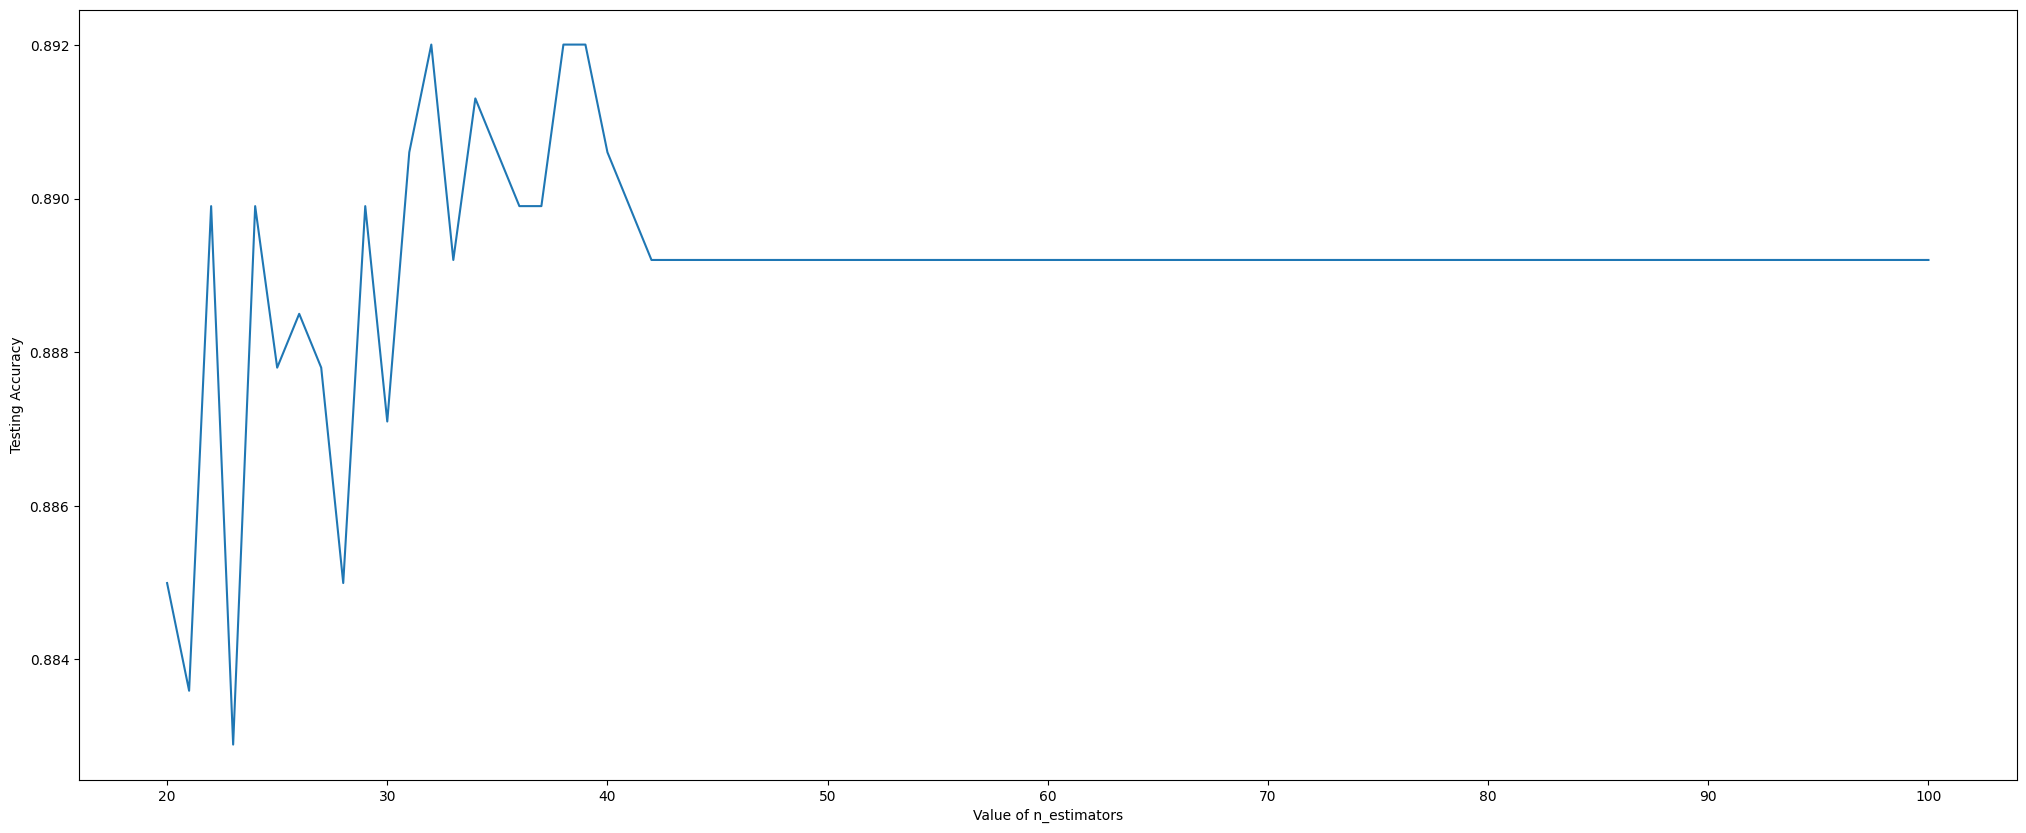

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=100
k_range = range (20,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0,n_jobs = -1)
  classifier.fit(x_train, y_train)
  y_pred=classifier.predict(x_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)


##Full dataset REading

In [ ]:
df_2 = pd.read_csv("/content/drive/MyDrive/Thesis_Data/REM_NREM.csv")
target = "Sleep_Stage"

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df_2[target] = encoder.fit_transform(df_2[target])

In [ ]:
x2 = df_2.loc[:,df_2.columns != target]       #df.loc[starting_row : ending row, list_of_columns]

y2 = df_2[target]

In [ ]:
from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2,test_size = 0.2)

In [ ]:
x_train2, y_train2 = balance(x_train2, y_train2)

##Result Default

In [ ]:
%time
from sklearn.ensemble import RandomForestClassifier
rf_def = RandomForestClassifier()
rf_def.fit(x_train2, y_train2)
y_pred=rf_def.predict(x_test2)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test2, y_pred))
print(classification_report(y_test2,y_pred))
print("Accurecy: ",accuracy_score(y_test2, y_pred))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs
[[13725   801]
 [  547  2747]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     14526
           1       0.77      0.83      0.80      3294

    accuracy                           0.92     17820
   macro avg       0.87      0.89      0.88     17820
weighted avg       0.93      0.92      0.93     17820

Accurecy:  0.924354657687991


##Result for Best Estimator

In [ ]:
%time
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator)
rf_estimator.fit(x_train2, y_train2)
y_pred=rf_estimator.predict(x_test2)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test2, y_pred))
print(classification_report(y_test2,y_pred))
print("Accurecy: ",accuracy_score(y_test2, y_pred))


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs
[[13722   804]
 [  529  2765]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     14526
           1       0.77      0.84      0.81      3294

    accuracy                           0.93     17820
   macro avg       0.87      0.89      0.88     17820
weighted avg       0.93      0.93      0.93     17820

Accurecy:  0.9251964085297418


##Result for Best Depth

In [ ]:
%time
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,n_jobs = -1)
rf_depth.fit(x_train2, y_train2)
y_pred=rf_depth.predict(x_test2)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test2, y_pred))
print(classification_report(y_test2,y_pred))
print("Accurecy: ",accuracy_score(y_test2, y_pred))


CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs
[[13733   793]
 [  545  2749]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     14526
           1       0.78      0.83      0.80      3294

    accuracy                           0.92     17820
   macro avg       0.87      0.89      0.88     17820
weighted avg       0.93      0.92      0.93     17820

Accurecy:  0.9249158249158249


##REsult for full config

In [ ]:
%time
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(max_depth=best_depth,n_estimators=best_estimator)
rf_all.fit(x_train2, y_train2)
y_pred=rf_all.predict(x_test2)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test2, y_pred))
print(classification_report(y_test2,y_pred))
print("Accurecy: ",accuracy_score(y_test2, y_pred))


CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs
[[13714   812]
 [  511  2783]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     14526
           1       0.77      0.84      0.81      3294

    accuracy                           0.93     17820
   macro avg       0.87      0.89      0.88     17820
weighted avg       0.93      0.93      0.93     17820

Accurecy:  0.9257575757575758


*Model Save and Load*

In [ ]:
import joblib

def save_model(model, model_name):
  joblib.dump(model,model_name)

def load_model(model_name):
  return joblib.load(model_name)

In [ ]:
save_model(rf,"RandomForest")